In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("Advertising.csv")

In [3]:
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
data.drop(["Unnamed: 0"],axis=1, inplace=True)

In [5]:
data

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
X=data.drop(["sales"],axis=1)
X

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [8]:
y=data["sales"]
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

In [9]:
import seaborn as sns

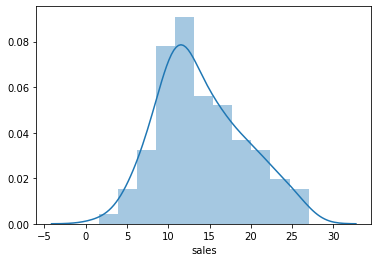

In [10]:
sns.distplot(data.sales)

In [11]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline

In [12]:
x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=1, test_size=0.25)

In [13]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((150, 3), (50, 3), (150,), (50,))

# pipeline

In [14]:
pipeline_lr=Pipeline([#("slectbestkfeature",SelectKBest(score_func=chi2,k=2)),
                      ("scalar1",StandardScaler()),
                      ("pca1",PCA(n_components=2)),
                      ("lr_regressor",LinearRegression())])


In [15]:
pipeline_lr.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('scalar1',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('pca1',
                 PCA(copy=True, iterated_power='auto', n_components=2,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('lr_classifier',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [21]:
pipeline_lr.score(x_train, y_train)

0.8088780464373809

In [22]:
pipeline_lr.score(x_test, y_test)

0.7021693901838273

In [31]:
pipeline_dt=Pipeline([#("slectbestkfeature",SelectKBest(score_func=chi2,k=2)),
                      ("scalar1",StandardScaler()),
                      ("pca1",PCA(n_components=2)),
                      ("dt_regressor",(DecisionTreeRegressor(max_depth=2,min_samples_leaf=2)))])


In [32]:
pipeline_dt.fit(x_train, y_train)

Pipeline(memory=None,
         steps=[('scalar1',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('pca1',
                 PCA(copy=True, iterated_power='auto', n_components=2,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('dt_regressor',
                 DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                       max_depth=2, max_features=None,
                                       max_leaf_nodes=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=2, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       presort='deprecated', random_state=None,
                                       splitter='best'))],
         verbose=Fal

In [33]:
pipeline_dt.score(x_train,y_train)

0.708329219741312

In [35]:
pipeline_dt.score(x_test,y_test)

0.44907623392022655